Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5683/5683 ━━━━━━━━━━━━━━━━━━━━ 6s 934us/step - accuracy: 0.7213 - loss: 0.5775 - val_accuracy: 0.8580 - val_loss: 0.3922
Epoch 2/5
5683/5683 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step - accuracy: 0.8559 - loss: 0.3960 - val_accuracy: 0.8579 - val_loss: 0.3920
Epoch 3/5
5683/5683 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8566 - loss: 0.3942 - val_accuracy: 0.8579 - val_loss: 0.3920
Epoch 4/5
5683/5683 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8571 - loss: 0.3940 - val_accuracy: 0.8578 - val_loss: 0.3920
Epoch 5/5
5683/5683 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8573 - loss: 0.3935 - val_accuracy: 0.8578 - val_loss: 0.3920
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step
TensorFlow Logistic Regression Accuracy: 0.8578

Confusion Matrix:
 [[38955    42]
 [ 6424    37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     38997
           1       0.47      0.01      0.01      6461

    accuracy              

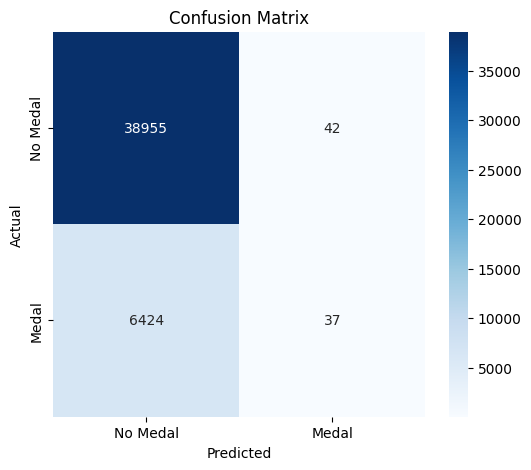

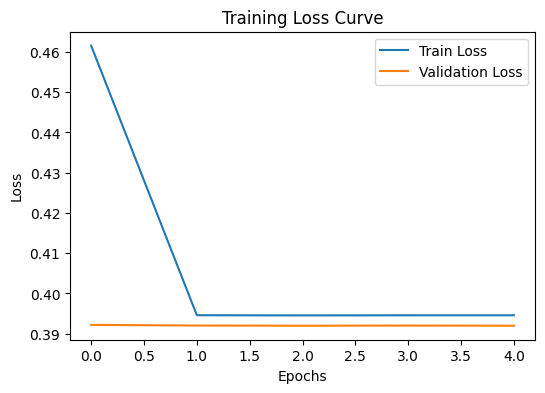

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./results/merged_olympics_results.csv") 

df['Medal_Won'] = df['Medal'].notna().astype(int)

df['Sex_Encoded'] = LabelEncoder().fit_transform(df['Sex'])

country_medal_counts = df.groupby('NOC')['Medal_Won'].sum().to_dict()
df['Past_Medal_Record'] = df['NOC'].map(country_medal_counts).fillna(0)

features = ['weight_kg', 'height_cm', 'Sex_Encoded', 'Past_Medal_Record']
df_model = df[features + ['Medal_Won']].dropna()

X = df_model[features].values
y = df_model['Medal_Won'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"TensorFlow Logistic Regression Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Medal", "Medal"], yticklabels=["No Medal", "Medal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curve")
plt.show()
